### Fish data (Predicting weight of the fish)

##### Linear regression model used

In [1]:
import pandas as pd
import matplotlib as plt
from sklearn import linear_model

import warnings
warnings.filterwarnings('ignore')
import numpy as np

import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.model_selection import cross_val_score, KFold, RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.utils import estimator_html_repr
from sklearn import set_config
set_config(display='diagram')


#### Import data

In [2]:
df = pd.read_csv('Fish.csv')
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.shape

(159, 7)

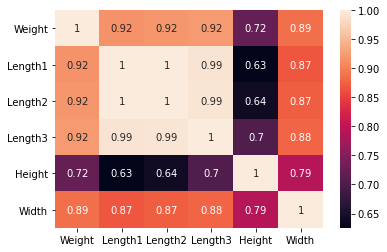

In [5]:
sns.heatmap(df.corr(),annot=True)

In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [7]:
Y = pd.DataFrame(df['Weight'],columns=['Weight'])

X = df.drop(columns=['Weight'])

In [8]:
cat_feat = [feature for feature in X.columns if X[feature].dtypes == 'O']

num_feat = [feature for feature in X.columns if feature not in cat_feat]

In [9]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=1232)

In [10]:
SimpleImputer.get_feature_names_out = (lambda self, names=None:
                                       self.feature_names_in_)

In [11]:
cat_pipe = Pipeline([
            
            ('cat_imputer',SimpleImputer(strategy="most_frequent")),
            ('one_hot_encoder',OneHotEncoder())
    
        ])
 
num_pipe = Pipeline([
     
             ('num_imputer',SimpleImputer(strategy="median")),
             ('std_scalar',StandardScaler())
        ])

In [12]:
preprocessing_pipe = ColumnTransformer([
            
            ('cat',cat_pipe,cat_feat),
            ('num',num_pipe,num_feat)
    
        ],remainder="passthrough")

In [13]:
model_pipe1 = Pipeline([

        ('model1',Ridge(random_state=123))
])

model_pipe2 = Pipeline([

        ('model2',Lasso(random_state=124))
])

model_pipe3 = Pipeline([
    
            ("model3",ElasticNet(random_state=243))    
    
])

In [14]:
full_pipeline1 = Pipeline([
            
            ('preprocessing',preprocessing_pipe),
            ('model_training1',model_pipe1)
    
    ])

full_pipeline2 = Pipeline([
            
            ('preprocessing',preprocessing_pipe),
            ('model_training2',model_pipe2)
    
    ])

full_pipeline3 = Pipeline([
            
            ('preprocessing',preprocessing_pipe),
            ('model_training3',model_pipe3)
    
    ])

In [15]:
full_pipeline1

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Species']),
                                                 ('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scalar',
                                                                   StandardScaler())]),
                                                  ['Length1', 'Length2',
                                                   'Length3', 'Height',
                                                   'Width'])])),
                ('model_training1',
                 Pipeline(steps=[('model1', Ridge(random_state=123))]))])

In [16]:
full_pipeline2

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Species']),
                                                 ('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scalar',
                                                                   StandardScaler())]),
                                                  ['Length1', 'Length2',
                                                   'Length3', 'Height',
                                                   'Width'])])),
                ('model_training2',
                 Pipeline(steps=[('model2', Lasso(random_state=124))]))])

In [17]:
full_pipeline3

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['Species']),
                                                 ('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('std_scalar',
                                                                   StandardScaler())]),
                                                  ['Length1', 'Length2',
                                                   'Length3', 'Height',
                                                   'Width'])])),
                ('model_training3',
                 Pipeline(steps=[('model3', ElasticNet(random_state=243))]))])

In [18]:
kf = KFold(n_splits=5,shuffle=True,random_state=987)
score1 = cross_val_score(full_pipeline1,x_train,y_train,cv=kf,scoring='r2').mean()
score2 = cross_val_score(full_pipeline2,x_train,y_train,cv=kf,scoring='r2').mean()
score3 = cross_val_score(full_pipeline3,x_train,y_train,cv=kf,scoring='r2').mean()

print(f"R squared score for the ridge regression on training set is {np.round(score1,3)}")
print(f"R squared score for the lasso regression on training set is {np.round(score2,3)}")
print(f"R squared score for the elasticnet regression on training set is {np.round(score3,3)}")

R squared score for the ridge regression on training set is 0.908
R squared score for the lasso regression on training set is 0.91
R squared score for the elasticnet regression on training set is 0.851


In [19]:
full_pipeline2.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'preprocessing', 'model_training2', 'preprocessing__n_jobs', 'preprocessing__remainder', 'preprocessing__sparse_threshold', 'preprocessing__transformer_weights', 'preprocessing__transformers', 'preprocessing__verbose', 'preprocessing__cat', 'preprocessing__num', 'preprocessing__cat__memory', 'preprocessing__cat__steps', 'preprocessing__cat__verbose', 'preprocessing__cat__cat_imputer', 'preprocessing__cat__one_hot_encoder', 'preprocessing__cat__cat_imputer__add_indicator', 'preprocessing__cat__cat_imputer__copy', 'preprocessing__cat__cat_imputer__fill_value', 'preprocessing__cat__cat_imputer__missing_values', 'preprocessing__cat__cat_imputer__strategy', 'preprocessing__cat__cat_imputer__verbose', 'preprocessing__cat__one_hot_encoder__categories', 'preprocessing__cat__one_hot_encoder__drop', 'preprocessing__cat__one_hot_encoder__dtype', 'preprocessing__cat__one_hot_encoder__handle_unknown', 'preprocessing__cat__one_hot_encoder__sparse', 'preproces

In [20]:
tuning_parameters = {}
tuning_parameters['model_training2__model2__alpha'] = np.arange(1,10,0.5)
tuning_parameters['model_training2__model2__selection'] = ['cyclic','random']

In [21]:
hyperparameter_tuning_results = RandomizedSearchCV(full_pipeline2,tuning_parameters,scoring='r2',random_state=764)

In [22]:
tuning_results = hyperparameter_tuning_results.fit(x_train,y_train)

In [23]:
a= [3,5,2,1,4]
a.sort(reverse=True)
a

[5, 4, 3, 2, 1]

In [24]:
## Using cross validation to find the best model out of three 

kf = KFold(n_splits=5,shuffle=True,random_state=987)
score1 = cross_val_score(full_pipeline1,x_train,y_train,cv=kf,scoring='r2').mean()
score2 = cross_val_score(full_pipeline2,x_train,y_train,cv=kf,scoring='r2').mean()
score3 = cross_val_score(full_pipeline3,x_train,y_train,cv=kf,scoring='r2').mean()

print(f"R squared score for the ridge regression on training set is {np.round(score1,3)}")
print(f"R squared score for the lasso regression on training set is {np.round(score2,3)}")
print(f"R squared score for the elasticnet regression on training set is {np.round(score3,3)}")

R squared score for the ridge regression on training set is 0.908
R squared score for the lasso regression on training set is 0.91
R squared score for the elasticnet regression on training set is 0.851
